# Problem Statement
Choose an appropriate model for the project to predict the customers who are eligible for the loan and
also find out what are the missing criteria why other customers are not eligible for the loan and answer
the following questions.

1. What's the ratio of Male to Female?
2. How many Males are married and non-married?
3. How many Females are married and non-married?
4. How many Males and Females are graduated and non-graduated with respect to their Marital status?
5. Which type of encoding will be required to perform on the "Education" column?
6. Is it a male or a female whose loan amount is the highest?
7. the specification and information about the applicant who has the highest  income?
8. What all features are you going to consider for the model training and why?( Give the appropriate reason for
choosing such features among others)
9. Which model are you going to choose and define the reason for going with the same model?
10. Have you performed the Hyper Parameter Tuning?
11. Compare the Actual results with the Predicted results
12. What's the accuracy of your model?
13. In order to improve the accuracy, what more approaches can be done?
14. What can you conclude with respect to the data?

# Outline
* Import Libraries / Packages
* Getting dataset ready
* Exploratory Data Analysis 
* Choosing the Model
* Testing the Model
* Deploy of the Model

# Import Libraries / Packages

In [ ]:
# Import Libraries for Analysis
import numpy as np
import pandas as pd

# Import Libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# import Ilbrary for Model Building
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import ExtraTreesClassifier

# accuracy
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# deploy of model
import pickle as pkl

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

#Getting dataset ready

In [ ]:
# Import the data set - training 
train = pd.read_csv("/content/drive/MyDrive/Data analyst proj/Training Data.csv")

# Print top 5 rows of train dataset
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
# Import the data set - testing
test = pd.read_csv("/content/drive/MyDrive/Data analyst proj/Testing Data.csv")

# Print top 5 rows of test dataset
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


# Exploratory Data Analysis 

In [ ]:
# Printing the shape 
print(train.shape)
print(test.shape)

(614, 13)
(367, 12)


Training set has 614 rows and 13 columns.
Testing set has 367 rows and 12 columns.

In [ ]:
# Printing the dimension 
print(train.ndim)

# Printing the columns name
print(train.columns)

2
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


1. The dataset contains missing and null values.
2. Columns are of dtypes- Object, int64, float64


In [ ]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
male_count=train['Gender'].value_counts()['Male']
female_count=train['Gender'].value_counts()['Female']
ratio_male_to_female=male_count/female_count
print(ratio_male_to_female)

4.366071428571429


1. The ratio of Male to Female - 4.366071428571429

In [ ]:
train[train['Gender']=='Male']['Gender'].groupby(train.Married).value_counts()

Married  Gender
No       Male      130
Yes      Male      357
Name: Gender, dtype: int64

2. Males are married - 357 

  Males are non-married - 130

In [ ]:
train[train['Gender']=='Female']['Gender'].groupby(train.Married).value_counts()

Married  Gender
No       Female    80
Yes      Female    31
Name: Gender, dtype: int64

3. Females are married - 31 

   Females are non-married - 80



In [ ]:
train['Education'].groupby([train.Gender,train.Married]).value_counts()

Gender  Married  Education   
Female  No       Graduate         66
                 Not Graduate     14
        Yes      Graduate         25
                 Not Graduate      6
Male    No       Graduate         99
                 Not Graduate     31
        Yes      Graduate        275
                 Not Graduate     82
Name: Education, dtype: int64

4. Males and Females are graduated and non-graduated with respect to their Marital status
   * Males are married and  graduated - 275
   * Males are married and non-graduated - 82
   * Males are non-married and  graduated - 99
   * Males are non-married and non-graduated - 31
   * Females are married and  graduated - 25
   * Females are married and non-graduated - 6
   * Females are non-married and  graduated - 66
   * Females are non-married and non-graduated - 14

In [ ]:
train['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

5. Encoding will be required to perform on the "Education" column - here rank doesn't matter it is nominal encoding we can use One Hot Encoding. 

In [ ]:
train[train.LoanAmount == train.LoanAmount.max()]["Gender"]

171    NaN
Name: Gender, dtype: object

In [ ]:
train.sort_values( "LoanAmount",axis=0,ascending=False,inplace=False)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
171,LP001585,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
130,LP001469,Male,No,0,Graduate,Yes,20166,0.0,650.0,480.0,NaN,Urban,Y
155,LP001536,Male,Yes,3+,Graduate,No,39999,0.0,600.0,180.0,0.0,Semiurban,Y
561,LP002813,Female,Yes,1,Graduate,Yes,19484,0.0,600.0,360.0,1.0,Semiurban,Y
369,LP002191,Male,Yes,0,Graduate,No,19730,5266.0,570.0,360.0,1.0,Rural,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,LP002533,Male,Yes,2,Graduate,No,2947,1603.0,NaN,360.0,1.0,Urban,N
524,LP002697,Male,No,0,Graduate,No,4680,2087.0,NaN,360.0,1.0,Semiurban,N
550,LP002778,Male,Yes,2,Graduate,Yes,6633,0.0,NaN,360.0,0.0,Rural,N
551,LP002784,Male,Yes,1,Not Graduate,No,2492,2375.0,NaN,360.0,1.0,Rural,Y


6. Is it a male or a female whose loan amount is the highest - 1st highest loan person gender is not known but male has  the 2nd highest loan amount.

7. Specification and information about the applicant who has the highest income

In [ ]:
train.sort_values("ApplicantIncome", axis=0, ascending=False, inplace=False).head(1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
409,LP002317,Male,Yes,3+,Graduate,No,81000,0.0,360.0,360.0,0.0,Rural,N


Checking for missing value

In [ ]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

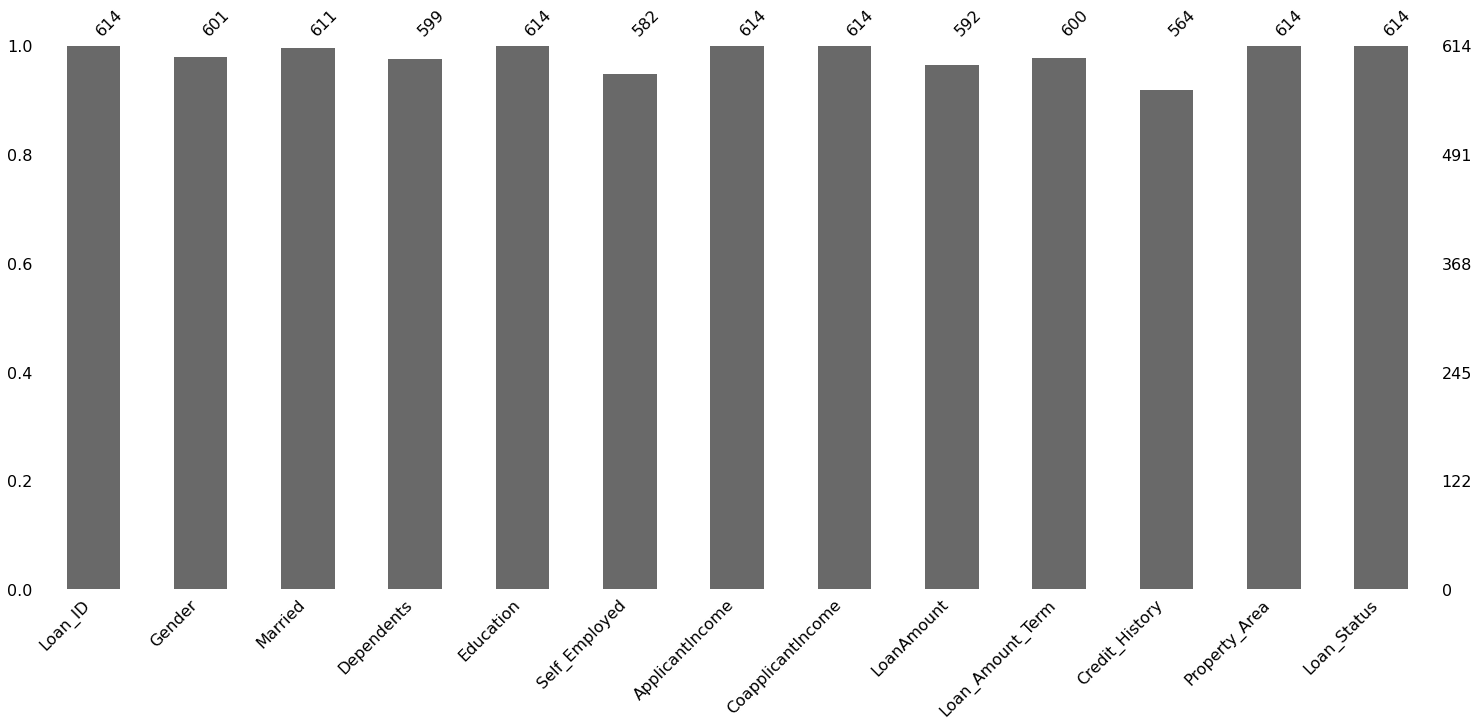

In [ ]:
msno.bar(train)

Filling the missing Value

For numerical variable use of mean or median for filling up the values

For categorical variables use of mode for filling up the values 

In [ ]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [ ]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

All the missing values are filled up of training set 

In [ ]:
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
test['Married'].fillna(train['Married'].mode()[0], inplace=True)
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [ ]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

All the missing values are filled up of testing set 

Looking for outliers

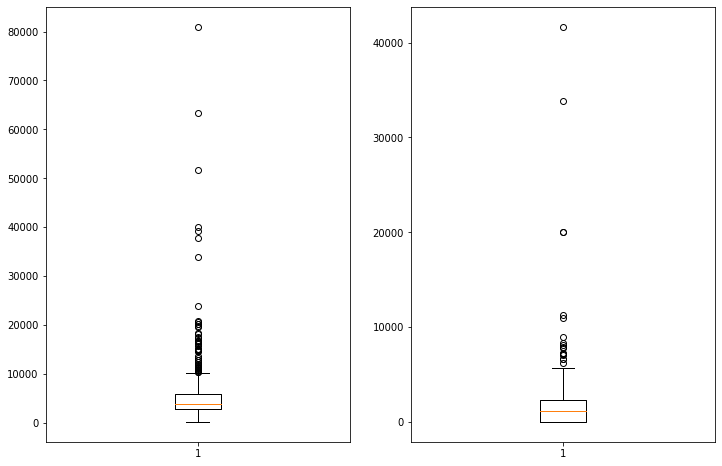

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12,8))
ax1.boxplot(train['ApplicantIncome'])
ax2.boxplot(train['CoapplicantIncome'])
plt.show()

Converting Categorical to Numerical

In [ ]:
print(train.Gender.unique())
print(train.Married.unique())
print(train.Self_Employed.unique())
print(train.Education.unique())
print(train.Property_Area.unique())
print(train.Dependents.unique())

['Male' 'Female']
['No' 'Yes']
['No' 'Yes']
['Graduate' 'Not Graduate']
['Urban' 'Rural' 'Semiurban']
['0' '1' '2' '3+']


In [ ]:
train.Loan_Status = train.Loan_Status.replace({"Y": 1, "N" : 0})

train.Gender = train.Gender.replace({"Male": 1, "Female" : 0})
test.Gender = test.Gender.replace({"Male": 1, "Female" : 0})

train.Married = train.Married.replace({"Yes": 1, "No" : 0})
test.Married = test.Married.replace({"Yes": 1, "No" : 0})

train.Self_Employed = train.Self_Employed.replace({"Yes": 1, "No" : 0})
test.Self_Employed = test.Self_Employed.replace({"Yes": 1, "No" : 0})

train.Education = train.Education.replace({"Graduate": 1, "Not Graduate": 0})
test.Education = test.Education.replace({"Graduate": 1, "'Not Graduate": 0})

train.Property_Area = train.Property_Area.replace({"Urban": 0, "Rural": 1, "Semiurban": 2 })
test.Property_Area = test.Property_Area.replace({"Urban": 0, "Rural": 1, "Semiurban": 2})

train['Dependents'] = np.where((train['Dependents'] == '0'), 0, 1) 
test['Dependents'] = np.where((test['Dependents'] == '0'), 0, 1) 

Featue Selection

In [ ]:
train.Loan_ID.nunique()

614

Since LoanID doesnot affect the loan status so we will drop it from train and test dataset 

In [ ]:
train=train.drop('Loan_ID',axis=1)
test=test.drop('Loan_ID',axis=1)

In [ ]:
X = train.iloc[:,:11]  
y = train.iloc[:,-1] 

[0.0189758  0.0206282  0.02988789 0.01850274 0.02158792 0.19976227
 0.12670581 0.19038578 0.04760265 0.27656944 0.0493915 ]


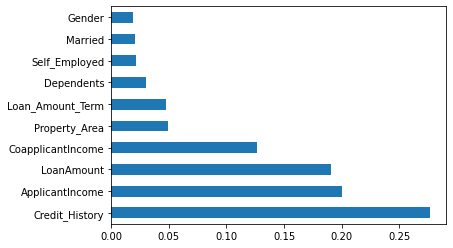

In [ ]:
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

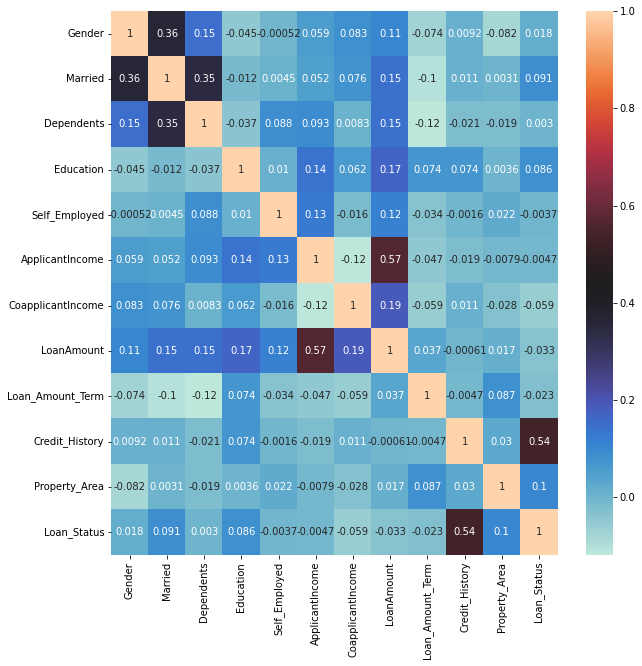

In [ ]:
corrmat = train.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))

#plot heat map
g=sns.heatmap(train[top_corr_features].corr(),annot=True,cmap="icefire")

8. Features going to consider for the model training - from above two method for feature selecton we have select the features
* Credit_History
* ApplicantIncome
* CoapplicantIncome
* Married
* Property_Area



In [ ]:
train_features = ["Married", "ApplicantIncome",	"CoapplicantIncome", "Credit_History", "Property_Area"]

Spliting of data

In [ ]:
x_train = train[train_features].values
y_train = train['Loan_Status'].values

x_test = test[train_features].values

# Choosing the Model

9. Models going to be choose for training-

We have seleced 3 model-

* Logistic Regression 
* K-nearest Neighbors
* Decision Tree

Depending upon the accuracy we will select the model

In [ ]:
# logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)
score = logistic_model.score(x_train, y_train)
print('accuracy_score overall :', score)

accuracy_score overall : 0.8127035830618893


In [ ]:
# K-nearest Neighbors
Knn_model = KNeighborsClassifier()
Knn_model.fit(x_train, y_train)
y_pred = Knn_model.predict(x_train)
print(accuracy_score(y_train, y_pred))
print(classification_report(y_train, y_pred))
print(confusion_matrix(y_train, y_pred))

0.7345276872964169
              precision    recall  f1-score   support

           0       0.64      0.35      0.45       192
           1       0.75      0.91      0.82       422

    accuracy                           0.73       614
   macro avg       0.70      0.63      0.64       614
weighted avg       0.72      0.73      0.71       614

[[ 67 125]
 [ 38 384]]


In [ ]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
Knn_2 = KNeighborsClassifier()
#Use GridSearch
Knn_2.fit(x_train, y_train)
y_pred = Knn_2.predict(x_train)
print(accuracy_score(y_train, y_pred))
print(classification_report(y_train, y_pred))

0.7345276872964169
              precision    recall  f1-score   support

           0       0.64      0.35      0.45       192
           1       0.75      0.91      0.82       422

    accuracy                           0.73       614
   macro avg       0.70      0.63      0.64       614
weighted avg       0.72      0.73      0.71       614



10. Have you performed the Hyper Parameter Tuning- Yes, for KNN model

In [ ]:
# Decision Tree
Dtree_model=DecisionTreeClassifier()
Dtree_model.fit(x_train, y_train)
score = Dtree_model.score(x_train, y_train)
print(score)

0.996742671009772


Since Decision Tree has highest accuracy so we will go with Decision tree model 

# Testing the Model

In [ ]:
pred = Dtree_model.predict(x_train)

11. Compare the Actual results with the Predicted results

In [ ]:
compare=pd.DataFrame({"Actual Loan Status":y_train, "Predicted Loan Status":pred})
compare

,Actual Loan Status,Predicted Loan Status
0,1,1
1,0,0
2,1,1
3,1,1
4,1,1
...,...,...
609,1,1
610,1,1
611,1,1
612,1,1


In [ ]:
score = Dtree_model.score(x_train, y_train)
print("Accuracy of the model :",score)

Accuracy of the model : 0.996742671009772


12. The accuracy of the model- 99.67%


13. In order to improve the accuracy, what more approaches can be done- more data can be collected, improvement in feature engineering. 

14. What can you conclude with respect to the data- the more the credit history of person more chances of him of getting a loan. The loan status mainly depends upon th features like "Married", "ApplicantIncome",	"CoapplicantIncome", "Credit_History", "Property_Area".

# Deploy of the Model

In [ ]:
filename = 'pickle_model.pkl'
pkl.dump(Dtree_model, open(filename, 'wb')) 

The person with good credit history is more liker to get loan than a person with bad credit history. "Married", "ApplicantIncome",	"CoapplicantIncome", "Credit_History", "Property_Area" are the feature upon which the loan status depends, if these features criteria matches the person will get the loan.